In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR

In [6]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [9]:
(iris.target[:10] == 2).astype("float64") 
#only getting the IrisVerginica and converting it into BinaryClassification

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
iris = datasets.load_iris()

X = iris["data"][:,(2,3)] # only retrieving the last 2 columns
y = (iris["target"] == 2).astype(np.float64)

In [17]:
svm_clf = Pipeline([
    ("scaler" , StandardScaler()),
    ("linear_svc" , LinearSVC(C = 1, loss= "hinge")), #C determines the width of road (boundary walls)
])

In [18]:
svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [20]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [22]:
svc = Pipeline([
    ("scaler" , StandardScaler()),
    ("linear_svc" , SVC(kernel = "linear",C = 1)), #C determines the width of road (boundary walls)
])

svc.fit(X,y)
svc.predict([[5.5,1.7]])

array([1.])

The LinearSVC class regularizes the bias term, so you should center the training set first by subtracting its mean. This is automatic if you scale the data using the StandardScaler . Moreover, make sure you set the loss hyperparameter to "hinge" , as it is not the default value. Finally, for better performance you should set the dual hyperparameter to False , unless there are more features than training instances.

The hinge loss is a loss function used for training classifiers, most notably the SVM. ... A negative distance from the boundary incurs a high hinge loss. This essentially means that we are on the wrong side of the boundary, and that the instance will be classified incorrectly.

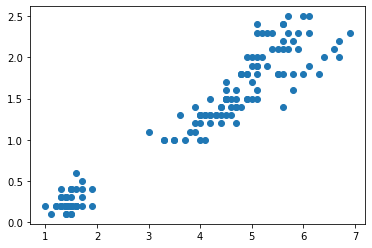

In [36]:
plt.scatter(X[:,0], X[:,1])

In [61]:
poly_svm_clf = Pipeline([
    ("Polnomial Features", PolynomialFeatures(degree = 3)),
    ("Standard Scaler", StandardScaler()),
    ("Linear Classifier", LinearSVC(C = 1, loss="hinge"))
])

poly_svm_clf.fit(X,y)

Pipeline(steps=[('Polnomial Features', PolynomialFeatures(degree=3)),
                ('Standard Scaler', StandardScaler()),
                ('Linear Classifier', LinearSVC(C=1, loss='hinge'))])

In [65]:
poly_svm_clf.predict([[5.5, 1.7]])

array([1.])

Adding polynomial features is simple to implement and can work great with all sorts
of Machine Learning algorithms (not just SVMs), but at a low polynomial degree it
cannot deal with very complex datasets, and with a high polynomial degree it creates
a huge number of features, making the model too slow.

Fortunately, when using SVMs you can apply an almost miraculous mathematical
technique called the kernel trick

In [67]:
poly_kernel = Pipeline([
    ("StandardScaler", StandardScaler()),
    ("svm_classifier", SVC(kernel = "poly", degree = 3, coef0 = 1, C = 1))
])
#The hyperparameter coef0 controls how much the model is influenced by 
#high-degree polynomials versus low-degree polynomials.

poly_kernel.fit(X,y)

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('svm_classifier', SVC(C=1, coef0=1, kernel='poly'))])

In [68]:
poly_kernel.predict([[5.5, 1.7]])

array([1.])

In [70]:
rbf_kernel = Pipeline([
    ("standard Scaler", StandardScaler()),
    ("Svm_ clf", SVC(kernel = "rbf", gamma = 5, C= 0.001))
])

rbf_kernel.fit(X,y)

Pipeline(steps=[('standard Scaler', StandardScaler()),
                ('Svm_ clf', SVC(C=0.001, gamma=5))])

Just like the polynomial features method, the similarity features method can be useful with any Machine Learning algorithm, but it may be computationally expensive to compute all the additional features, especially on large training sets. However, once again the kernel trick does its SVM magic: it makes it possible to obtain a similar
result as if you had added many similarity features, without actually having to add them. Let’s try the Gaussian RBF kernel using the SVC class

Increasing gamma makes the bell-shape curve narrower and as a result each instance’s range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances. Conversely, a small gamma value makes the bell-shaped curve wider, so instances have a larger range of influence, and the decision boundary ends up smoother. So Gamma acts like a regularization hyperparameter: if your model is overfitting, you should reduce it, and if it is underfitting, you should increase it (similar to the C hyperparameter).

In [73]:
linear_svr = LinearSVR(epsilon = 1.5)
linear_svr.fit(X, y)

LinearSVR(epsilon=1.5)

The SVM algorithm is quite versatile: not only does it support linear and nonlinear classification, but it also supports linear and nonlinear regression.
The trick is to reverse the objective: instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM Regression tries to fit as many instances as possible on the street while limiting margin violations (i.e., instances off the street). The width of the street is controlled by a hyperparameter ε (epsilon) .

In [75]:
svr_poly = SVR(kernel = "poly", degree = 2, C= 100, epsilon = 0.1)
svr_poly.fit(X,y)

SVR(C=100, degree=2, kernel='poly')

Using Scikit-Learn’s SVR class (which supports the kernel trick). The SVR class is the regression equivalent of the SVC class, and the LinearSVR class is the regression equivalent of the LinearSVC class. The LinearSVR class scales linearly with the size of the training set (just like the LinearSVC class), while the SVR class gets much too slow when the training set grows large (just like the SVC class).